<a href="https://colab.research.google.com/github/daleas0120/Metallurgy/blob/main/TightBinding_w_SKparam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pythtb --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 3.1 MB/s 
  Created wheel for pythtb: filename=pythtb-1.7.2-py3-none-any.whl size=39977 sha256=c818c58a7d6140c2f4123859d2d52f01195d5a7ab573a9328b0adfa7ae79e7c0
  Stored in directory: /root/.cache/pip/wheels/6c/07/4a/61071230093d1f8d2932e8b8ec557d472e36c0512437bb3153
Successfully built pythtb


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

from IPython.display import Image
from IPython.core.display import HTML



# Introduction
This notebook is to test and see if the tight binding model can be used to calculate the intersections between the fermi surface and higher level brillouin zones.  First, I am following the tutorial for the NH3 molecule as shown here: http://www.physics.rutgers.edu/pythtb/examples.html

Next, I try to implement the Slater-Koster module addition from https://github.com/TomushT/SKext2PythTB.

## 1. $NH_3$ (Ammonia) Example

![](https://drive.google.com/file/d/1-pd9Winzlaaf5Z_lGU2ltzewgHRSFFnT/view?usp=sharing)

### 1.1 Define the lattice vectors (in real space)

In [4]:
a = [1.0, 0.0, 0.0]
b = [0.0, 1.0, 0.0]
c = [0.0, 0.0, 1.0]
lat = [a, b, c]

### 1.2 Define Coordinates of the Orbitals

The three hyrdrogen molecules are arranged in a trigonal base, while the nitrogen sits at the top most position.  The coordinates are expressed in a unitary cartesian coordinate system

In [5]:
sq32=np.sqrt(3.0)/2.0
orb_n = [0.,   0., 1.]
orb_h1 = [(2./3.)*sq32, 0., 0.]
orb_h2 = [(-1./3.)*sq32, 1./2., 0.]
orb_h3 = [(-1./3.)*sq32, -1./2., 0.]
orb = [orb_h1,
       orb_h2, 
       orb_h3,
       orb_n]

### 1.3 Make Zero-Dimensional Tight Binding Model

In [6]:
nh3_model = tb_model(0, 3, lat, orb)

### 1.4 Set model parameters

In [7]:
delta = 0.5 #<-- these are the energies on the lattice sites
t_first = 1.0 #<-- this is the hopping parameter

### 1.5 Change onsite energies so that N and H don't have the same energy

In [8]:
nh3_model.set_onsite([-delta, -delta, -delta, delta])

### 1.6 Set the hopptings, one for each connected pair of orbitals



```
my_model.set_hop(amplitude, i, j)
```



In [9]:
nh3_model.set_hop(t_first, 0, 1)
nh3_model.set_hop(t_first, 0, 2)
nh3_model.set_hop(t_first, 0, 3)
nh3_model.set_hop(t_first, 1, 2)
nh3_model.set_hop(t_first, 1, 3)
nh3_model.set_hop(t_first, 2, 3)

### 1.7 Print the model for inspection

In [10]:
nh3_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 0
r-space dimension           = 3
number of spin components   = 1
periodic directions         = []
number of orbitals          = 4
number of electronic states = 4
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [  0.5774 ,     0.0 ,     0.0 ]
 #  1  ===>  [ -0.2887 ,     0.5 ,     0.0 ]
 #  2  ===>  [ -0.2887 ,    -0.5 ,     0.0 ]
 #  3  ===>  [     0.0 ,     0.0 ,     1.0 ]
site energies:
 #  0  ===>      -0.5
 #  1  ===>      -0.5
 #  2  ===>      -0.5
 #  3  ===>       0.5
hoppings:
<  0 | H |  1 >     ===>      1.0 +     0.0 i
<  0 | H |  2 >     ===>      1.0 +     0.0 i
<  0 | H |  3 >     ===>      1.0 +     0.0 i
<  1 | H |  2 >     ===>      1.0 +     0.0 i
<  1 | H |  3 >     ===>      1.0 +     0.0 i

### 1.8 Solve the model

In [11]:
nh3_evals = nh3_model.solve_all()

### 1.9 Plot Results

Text(0, 0.5, 'Energy')

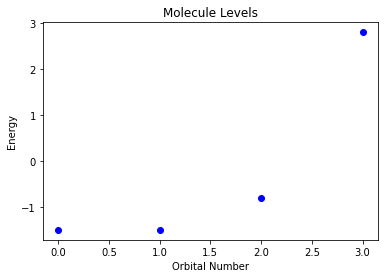

In [12]:
fig, ax = plt.subplots()
# Plot all states
ax.plot(nh3_evals, "bo")
ax.set_title("Molecule Levels")
ax.set_xlabel("Orbital Number")
ax.set_ylabel("Energy")

# Slater-Koster Approximation Extension

An extension to the PythTB package implementing the Slater-Koster approximations is implemented below (using the examples from the original GitHub repo here: https://github.com/TomushT/SKext2PythTB).

In [15]:
!wget https://raw.githubusercontent.com/TomushT/SKext2PythTB/main/sk_extension.py

--2022-07-21 15:01:42--  https://raw.githubusercontent.com/TomushT/SKext2PythTB/main/sk_extension.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24553 (24K) [text/plain]
Saving to: ‘sk_extension.py’

sk_extension.py     100%[===================>]  23.98K  --.-KB/s    in 0s      

2022-07-21 15:01:42 (48.8 MB/s) - ‘sk_extension.py’ saved [24553/24553]



In [16]:
import sk_extension as ske

## 2. Implement the HgTe sp3d5 model fitted by Thomas Rauch


### 2.1 Define the lattice vectors

In [17]:
#lat=[[0.5,0.5,0.0],[0.0,0.5,0.5],[0.5,0.0,0.5]]
lat = [[1.0, 1.0, 0.0], [0.0, 1.0, 1.0], [1.0, 0.0, 1.0]]



### 2.2 Define the Atoms


```
atom1 = [[x_coord, y_coord, z_coord], [orb1, orb2, orb3, ..., orbn], [E1, E2, E3, ..., En]]

atoms = [atom1, atom2, ..., atomN]
```





In [18]:


atoms = [
         [[0.,0.,0.],
          [0,1,2,3,4,5,6,7,8],
          [0.1441,4.7989,4.7989,4.7989,-6.2819,-6.2819,-6.2819,-6.2819,-6.2819]],
         [[0.25,0.25,0.25],
          [0,1,2,3,4,5,6,7,8],
          [-10.1191,-1.2874,-1.2874,-1.2874,9.7816,9.7816,9.7816,9.7816,9.7816]]
         ]

### 2.3 Make 3D Tight Binding Model with SK Extension

In [19]:
my_model = ske.init_model_SK(3, 3, lat, atoms)

Number of atoms:  2
Atom
0
coordinates: [0.0, 0.0, 0.0]
orbital: 0 energy: 0.1441
orbital: 1 energy: 4.7989
orbital: 2 energy: 4.7989
orbital: 3 energy: 4.7989
orbital: 4 energy: -6.2819
orbital: 5 energy: -6.2819
orbital: 6 energy: -6.2819
orbital: 7 energy: -6.2819
orbital: 8 energy: -6.2819
1
coordinates: [0.25, 0.25, 0.25]
orbital: 0 energy: -10.1191
orbital: 1 energy: -1.2874
orbital: 2 energy: -1.2874
orbital: 3 energy: -1.2874
orbital: 4 energy: 9.7816
orbital: 5 energy: 9.7816
orbital: 6 energy: 9.7816
orbital: 7 energy: 9.7816
orbital: 8 energy: 9.7816


### 2.4 Define Hoppings

Note that the short-hand for orbital interactions is as follows:

| Acronym | Bond |
| --- | --- |
| sss | ss-sigma |
| sps | sp-sigma |
| pdp | pd-pi |
| ddd | dd-delta |
| ... | ... |

#### 1st Neighbors: Hg -> Te

In [20]:
sss1 = 0.652875363768169
sps1 =  1.58154985033517
pss1 = 0.138917060362976
pps1 = 1.5302
ppp1 =-0.28968
sds1 =  1.71851381114842     
pds1 =-8.874398770073622E-003
pdp1 =  1.01816156748847     
dss1 =-0.678772036896918     
dps1 = 0.864895327149847     
dpp1 = 1.383208024574967E-002
dds1 =-0.903921527244890     
ddp1 =-0.985108201035476     
ddd1 =-5.190033671149452E-003


#### 2nd Neighbors: Hg -> Hg

In [21]:
sss2_Hg_Hg =-9.006034776345326E-002
sps2_Hg_Hg =-0.100012318930304    
pss2_Hg_Hg =-0.100012318930304    
pps2_Hg_Hg = 0.434689044462726    
ppp2_Hg_Hg =-0.279487808587277    
sds2_Hg_Hg =-0.111597972915523     
pds2_Hg_Hg =-0.404462077133189     
pdp2_Hg_Hg =-0.156317681440761     
dss2_Hg_Hg =-0.111597972915523     
dps2_Hg_Hg =-0.404462077133189     
dpp2_Hg_Hg =-0.156317681440761     
dds2_Hg_Hg =-9.360294973299493E-002
ddp2_Hg_Hg = 5.000878217200200E-002
ddd2_Hg_Hg = 3.114273894912767E-002

#### 2nd Neighbors: Te -> Te

In [22]:
sss2_Te_Te =-3.927452645188628E-002
sps2_Te_Te = 0.380944817503874     
pss2_Te_Te = 0.380944817503874     
pps2_Te_Te = 0.279890091293738     
ppp2_Te_Te = 1.045782905484532E-002
sds2_Te_Te =-0.605144766828820     
pds2_Te_Te = 0.703366721880547     
pdp2_Te_Te = 9.667287823598020E-002
dss2_Te_Te =-0.605144766828820     
dps2_Te_Te = 0.703366721880547     
dpp2_Te_Te = 9.667287823598020E-002
dds2_Te_Te = 0.658708072029976     
ddp2_Te_Te =-0.971938310011725     
ddd2_Te_Te = 0.114760749393371   

### 2.5 Add Hoppings to Model

#### 1st Neighbors

In [23]:
my_model = ske.set_hop_SK(my_model,atoms, 0, 1, [ 0, 0, 0], sss1,sps1,pss1,pps1,ppp1,sds=sds1,pds=pds1,pdp=pdp1,dss=dss1,dps=dps1,dpp=dpp1,dds=dds1,ddp=ddp1,ddd=ddd1)
my_model = ske.set_hop_SK(my_model,atoms, 0, 1, [ 0, 0,-1], sss1,sps1,pss1,pps1,ppp1,sds=sds1,pds=pds1,pdp=pdp1,dss=dss1,dps=dps1,dpp=dpp1,dds=dds1,ddp=ddp1,ddd=ddd1)
my_model = ske.set_hop_SK(my_model,atoms, 0, 1, [-1, 0, 0], sss1,sps1,pss1,pps1,ppp1,sds=sds1,pds=pds1,pdp=pdp1,dss=dss1,dps=dps1,dpp=dpp1,dds=dds1,ddp=ddp1,ddd=ddd1)
my_model = ske.set_hop_SK(my_model,atoms, 0, 1, [ 0,-1, 0], sss1,sps1,pss1,pps1,ppp1,sds=sds1,pds=pds1,pdp=pdp1,dss=dss1,dps=dps1,dpp=dpp1,dds=dds1,ddp=ddp1,ddd=ddd1)



Generating the hoppings from the SK parameters
Direction cosines: [0.57735027 0.57735027 0.57735027]

Generating the hoppings from the SK parameters
Direction cosines: [-0.57735027  0.57735027 -0.57735027]

Generating the hoppings from the SK parameters
Direction cosines: [-0.57735027 -0.57735027  0.57735027]

Generating the hoppings from the SK parameters
Direction cosines: [ 0.57735027 -0.57735027 -0.57735027]


#### 2nd Neighbors Hg -> Hg

In [24]:
my_model = ske.set_hop_SK(my_model,atoms, 0, 0, [ 0, 1, 0], sss2_Hg_Hg,sps2_Hg_Hg,pss2_Hg_Hg,pps2_Hg_Hg,ppp2_Hg_Hg,sds=sds2_Hg_Hg,pds=pds2_Hg_Hg,pdp=pdp2_Hg_Hg,dss=dss2_Hg_Hg,dps=dps2_Hg_Hg,dpp=dpp2_Hg_Hg,dds=dds2_Hg_Hg,ddp=ddp2_Hg_Hg,ddd=ddd2_Hg_Hg)
my_model = ske.set_hop_SK(my_model,atoms, 0, 0, [ 0, 0, 1], sss2_Hg_Hg,sps2_Hg_Hg,pss2_Hg_Hg,pps2_Hg_Hg,ppp2_Hg_Hg,sds=sds2_Hg_Hg,pds=pds2_Hg_Hg,pdp=pdp2_Hg_Hg,dss=dss2_Hg_Hg,dps=dps2_Hg_Hg,dpp=dpp2_Hg_Hg,dds=dds2_Hg_Hg,ddp=ddp2_Hg_Hg,ddd=ddd2_Hg_Hg)
my_model = ske.set_hop_SK(my_model,atoms, 0, 0, [ 1, 0, 0], sss2_Hg_Hg,sps2_Hg_Hg,pss2_Hg_Hg,pps2_Hg_Hg,ppp2_Hg_Hg,sds=sds2_Hg_Hg,pds=pds2_Hg_Hg,pdp=pdp2_Hg_Hg,dss=dss2_Hg_Hg,dps=dps2_Hg_Hg,dpp=dpp2_Hg_Hg,dds=dds2_Hg_Hg,ddp=ddp2_Hg_Hg,ddd=ddd2_Hg_Hg)
my_model = ske.set_hop_SK(my_model,atoms, 0, 0, [ 1, 0,-1], sss2_Hg_Hg,sps2_Hg_Hg,pss2_Hg_Hg,pps2_Hg_Hg,ppp2_Hg_Hg,sds=sds2_Hg_Hg,pds=pds2_Hg_Hg,pdp=pdp2_Hg_Hg,dss=dss2_Hg_Hg,dps=dps2_Hg_Hg,dpp=dpp2_Hg_Hg,dds=dds2_Hg_Hg,ddp=ddp2_Hg_Hg,ddd=ddd2_Hg_Hg)
my_model = ske.set_hop_SK(my_model,atoms, 0, 0, [-1, 1, 0], sss2_Hg_Hg,sps2_Hg_Hg,pss2_Hg_Hg,pps2_Hg_Hg,ppp2_Hg_Hg,sds=sds2_Hg_Hg,pds=pds2_Hg_Hg,pdp=pdp2_Hg_Hg,dss=dss2_Hg_Hg,dps=dps2_Hg_Hg,dpp=dpp2_Hg_Hg,dds=dds2_Hg_Hg,ddp=ddp2_Hg_Hg,ddd=ddd2_Hg_Hg)
my_model = ske.set_hop_SK(my_model,atoms, 0, 0, [ 0, 1,-1], sss2_Hg_Hg,sps2_Hg_Hg,pss2_Hg_Hg,pps2_Hg_Hg,ppp2_Hg_Hg,sds=sds2_Hg_Hg,pds=pds2_Hg_Hg,pdp=pdp2_Hg_Hg,dss=dss2_Hg_Hg,dps=dps2_Hg_Hg,dpp=dpp2_Hg_Hg,dds=dds2_Hg_Hg,ddp=ddp2_Hg_Hg,ddd=ddd2_Hg_Hg)



Generating the hoppings from the SK parameters
Direction cosines: [0.         0.70710678 0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [0.70710678 0.         0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [0.70710678 0.70710678 0.        ]

Generating the hoppings from the SK parameters
Direction cosines: [ 0.          0.70710678 -0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [-0.70710678  0.          0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [-0.70710678  0.70710678  0.        ]


#### 2nd Neighbors Te -> Te

In [25]:
my_model = ske.set_hop_SK(my_model,atoms, 1, 1, [ 0, 1, 0], sss2_Te_Te,sps2_Te_Te,pss2_Te_Te,pps2_Te_Te,ppp2_Te_Te,sds=sds2_Te_Te,pds=pds2_Te_Te,pdp=pdp2_Te_Te,dss=dss2_Te_Te,dps=dps2_Te_Te,dpp=dpp2_Te_Te,dds=dds2_Te_Te,ddp=ddp2_Te_Te,ddd=ddd2_Te_Te)
my_model = ske.set_hop_SK(my_model,atoms, 1, 1, [ 0, 0, 1], sss2_Te_Te,sps2_Te_Te,pss2_Te_Te,pps2_Te_Te,ppp2_Te_Te,sds=sds2_Te_Te,pds=pds2_Te_Te,pdp=pdp2_Te_Te,dss=dss2_Te_Te,dps=dps2_Te_Te,dpp=dpp2_Te_Te,dds=dds2_Te_Te,ddp=ddp2_Te_Te,ddd=ddd2_Te_Te)
my_model = ske.set_hop_SK(my_model,atoms, 1, 1, [ 1, 0, 0], sss2_Te_Te,sps2_Te_Te,pss2_Te_Te,pps2_Te_Te,ppp2_Te_Te,sds=sds2_Te_Te,pds=pds2_Te_Te,pdp=pdp2_Te_Te,dss=dss2_Te_Te,dps=dps2_Te_Te,dpp=dpp2_Te_Te,dds=dds2_Te_Te,ddp=ddp2_Te_Te,ddd=ddd2_Te_Te)
my_model = ske.set_hop_SK(my_model,atoms, 1, 1, [ 1, 0,-1], sss2_Te_Te,sps2_Te_Te,pss2_Te_Te,pps2_Te_Te,ppp2_Te_Te,sds=sds2_Te_Te,pds=pds2_Te_Te,pdp=pdp2_Te_Te,dss=dss2_Te_Te,dps=dps2_Te_Te,dpp=dpp2_Te_Te,dds=dds2_Te_Te,ddp=ddp2_Te_Te,ddd=ddd2_Te_Te)
my_model = ske.set_hop_SK(my_model,atoms, 1, 1, [-1, 1, 0], sss2_Te_Te,sps2_Te_Te,pss2_Te_Te,pps2_Te_Te,ppp2_Te_Te,sds=sds2_Te_Te,pds=pds2_Te_Te,pdp=pdp2_Te_Te,dss=dss2_Te_Te,dps=dps2_Te_Te,dpp=dpp2_Te_Te,dds=dds2_Te_Te,ddp=ddp2_Te_Te,ddd=ddd2_Te_Te)
my_model = ske.set_hop_SK(my_model,atoms, 1, 1, [ 0, 1,-1], sss2_Te_Te,sps2_Te_Te,pss2_Te_Te,pps2_Te_Te,ppp2_Te_Te,sds=sds2_Te_Te,pds=pds2_Te_Te,pdp=pdp2_Te_Te,dss=dss2_Te_Te,dps=dps2_Te_Te,dpp=dpp2_Te_Te,dds=dds2_Te_Te,ddp=ddp2_Te_Te,ddd=ddd2_Te_Te)



Generating the hoppings from the SK parameters
Direction cosines: [0.         0.70710678 0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [0.70710678 0.         0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [0.70710678 0.70710678 0.        ]

Generating the hoppings from the SK parameters
Direction cosines: [ 0.          0.70710678 -0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [-0.70710678  0.          0.70710678]

Generating the hoppings from the SK parameters
Direction cosines: [-0.70710678  0.70710678  0.        ]


### 2.6 Add Spin-Orbit Coupling (SOC) to the model

In [26]:
soc_p = [0.52, 0.34]
soc_d = [0.31, 0.22]
my_model = ske.set_SOC_onsite_p(my_model,atoms,soc_p)
my_model = ske.set_SOC_onsite_d(my_model,atoms,soc_d)

### 2.7 Print the model for inspection

In [27]:
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 2
periodic directions         = [0, 1, 2]
number of orbitals          = 18
number of electronic states = 36
lattice vectors:
 #  0  ===>  [     1.0 ,     1.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     1.0 ]
 #  2  ===>  [     1.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  3  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  4  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  5  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  6  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  7  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  8  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  9  ===>  [    0.25 ,    0.25 ,    0.25 ]
 # 10  ===>  [    0.25 ,    0.25 ,    0.25 ]
 # 11  ===>  [    

### 2.8 Define Path in K-space
Used for energy band calculation

In [28]:
# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected

path=[[0.,0.,0.],[.5,.5,0.],[3./4.,.5,0.25],[.5,.5,.5],[0.,0.,0.],[3./4.,3./8.,3./8.]]

# labels of the nodes
label=(r'$\Gamma $', r'$X$', r'$W$',r'$L$', r'$\Gamma $',r'$K$')

# total number of interpolated k-points along the path
nk=500

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)


----- k_path report begin ----------
real-space lattice vectors
 [[1. 1. 0.]
 [0. 1. 1.]
 [1. 0. 1.]]
k-space metric tensor
 [[ 0.75 -0.25 -0.25]
 [-0.25  0.75 -0.25]
 [-0.25 -0.25  0.75]]
internal coordinates of nodes
 [[0.    0.    0.   ]
 [0.5   0.5   0.   ]
 [0.75  0.5   0.25 ]
 [0.5   0.5   0.5  ]
 [0.    0.    0.   ]
 [0.75  0.375 0.375]]
reciprocal-space lattice vectors
 [[ 0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5 -0.5  0.5]]
cartesian coordinates of nodes
 [[0.    0.    0.   ]
 [0.    0.5   0.   ]
 [0.25  0.5   0.   ]
 [0.25  0.25  0.25 ]
 [0.    0.    0.   ]
 [0.375 0.375 0.   ]]
list of segments:
  length =     0.5  from  [0. 0. 0.]  to  [0.5 0.5 0. ]
  length =    0.25  from  [0.5 0.5 0. ]  to  [0.75 0.5  0.25]
  length = 0.35355  from  [0.75 0.5  0.25]  to  [0.5 0.5 0.5]
  length = 0.43301  from  [0.5 0.5 0.5]  to  [0. 0. 0.]
  length = 0.53033  from  [0. 0. 0.]  to  [0.75  0.375 0.375]
node distance list: [0.      0.5     0.75    1.10355 1.53657 2.0669 ]
node index list:   

### 2.9 Solve the model

In [29]:
import time

tic = time.perf_counter()
evals=my_model.solve_all(k_vec)
toc = time.perf_counter()
print("Time to Evaluate Model: %.2f seconds" % float(toc-tic))

Time to Evaluate Model: 23.96 seconds


### 2.10 Plot Results

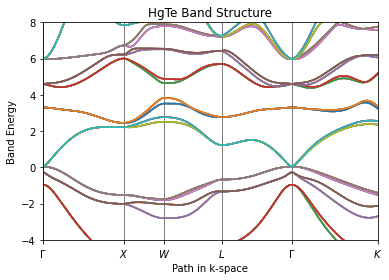

In [30]:
fig, ax = plt.subplots()
ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)

for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')

  ax.set_title("HgTe Band Structure")
  ax.set_xlabel("Path in k-space")
  ax.set_ylabel("Band Energy")

  ax.set_ylim(-4, 8)
  for j in range(int(len(evals[:, 0]))):
    ax.plot(k_dist, evals[j])

# Additional Plotted Results

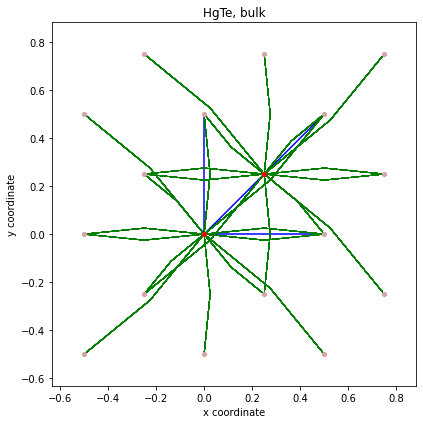

In [ ]:
(fig,ax)=my_model.visualize(0,1)
ax.set_title("HgTe, bulk")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()

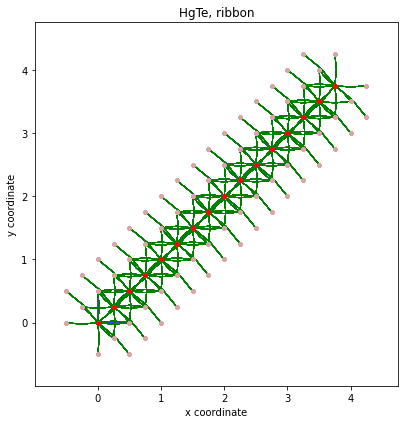

In [ ]:
# cutout finite model along direction 0
cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#
(fig,ax)=cut_one.visualize(0,1)
ax.set_title("HgTe, ribbon")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()